<a href="https://colab.research.google.com/github/ehpub/kfq_ML_2023/blob/main/kfq2023_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [7]:
def entropy(p):
  q = 1- p
  ep = -(p*np.log2(p) + q*np.log2(q))
  return ep

In [8]:
entropy(0.5)

1.0

In [9]:
entropy(0.9)

0.4689955935892811

In [10]:
entropy(0.99)

0.08079313589591124

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree

In [18]:
iris = load_iris()

In [19]:
x_train,x_test,y_train,y_test = train_test_split(iris.data,
                                                 iris.target)

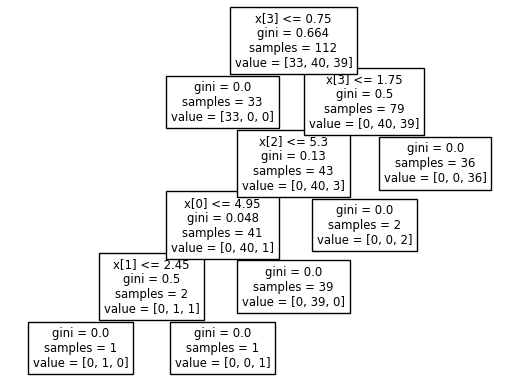

In [22]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
tree.plot_tree(dtc)
plt.show()

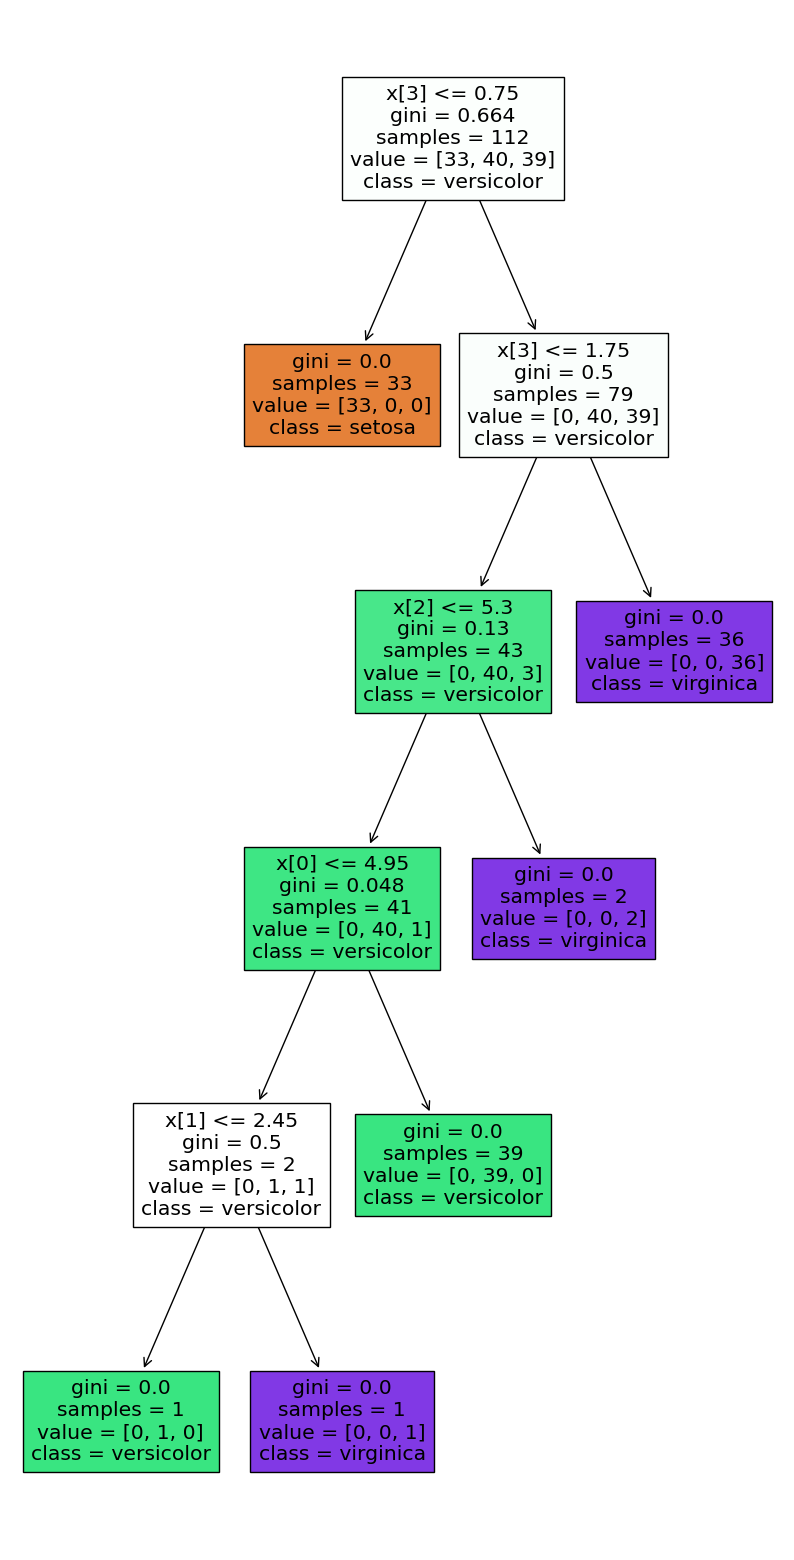

In [26]:
plt.figure(figsize=(10,20))
tree.plot_tree(dtc,filled=True,
               class_names=iris.target_names)
plt.show()

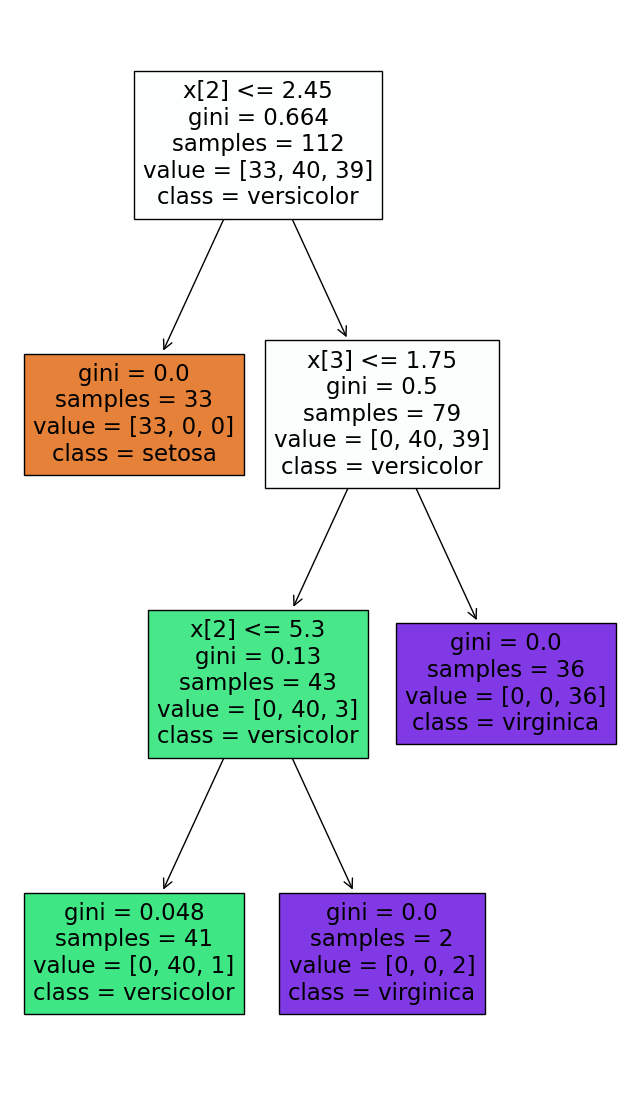

In [31]:
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(x_train,y_train)
plt.figure(figsize=(8,14))
tree.plot_tree(dtc,filled=True,
               class_names=iris.target_names)
plt.show()

In [32]:
def gini(p):
  q = 1-p
  return 1 - (p**2 + q**2)

In [33]:
gini(0.5)

0.5

In [34]:
gini(0.1)

0.17999999999999994

In [38]:
def gini2(datas):
  total = 0
  for data in datas:
    total += data
  s = 0
  for data in datas:
    s += (data/total)**2

  return 1 - s

In [41]:
gini2([33,40,39])

0.6643813775510204

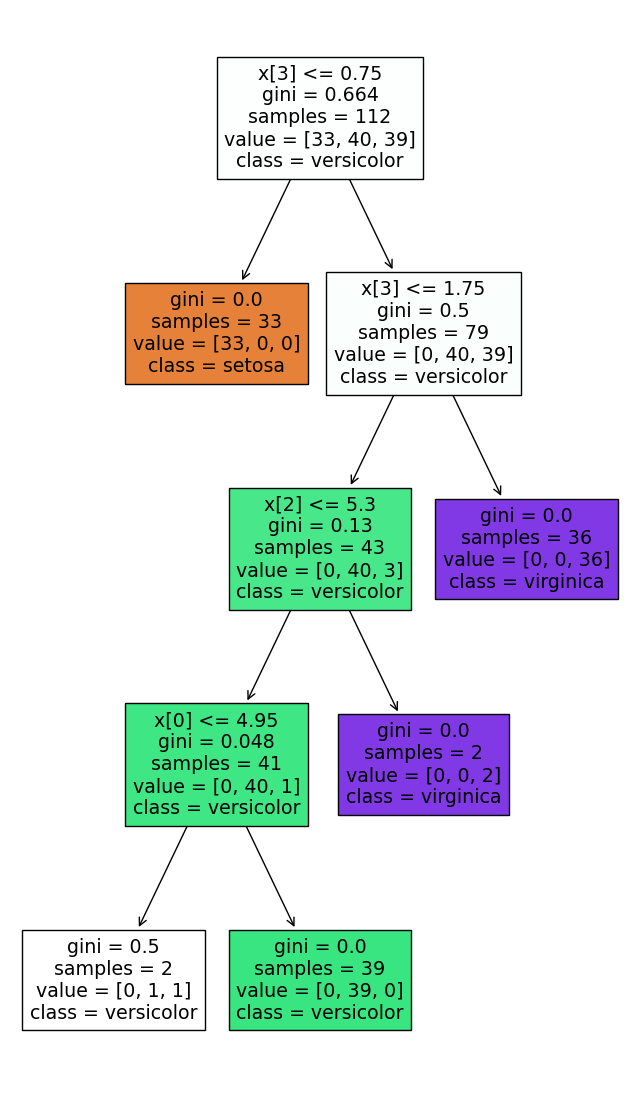

In [43]:
dtc = DecisionTreeClassifier(min_samples_split=5)
dtc.fit(x_train,y_train)
plt.figure(figsize=(8,14))
tree.plot_tree(dtc,filled=True,
               class_names=iris.target_names)
plt.show()

In [44]:
dtc.feature_importances_

array([0.0129575 , 0.        , 0.04945022, 0.93759228])

In [45]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [47]:
import pandas as pd

In [52]:
ss = pd.Series(iris.data[:,0])
rg = np.arange(ss.min(),ss.max(),0.3)
rg

array([4.3, 4.6, 4.9, 5.2, 5.5, 5.8, 6.1, 6.4, 6.7, 7. , 7.3, 7.6, 7.9])

In [ ]:
gvs = []
for i, r in enumerate(rg):
  print(i,"====")
  fil = ss<r
  ts = pd.Series(iris.target)
  print(ts[fil])


In [61]:
import seaborn as sns

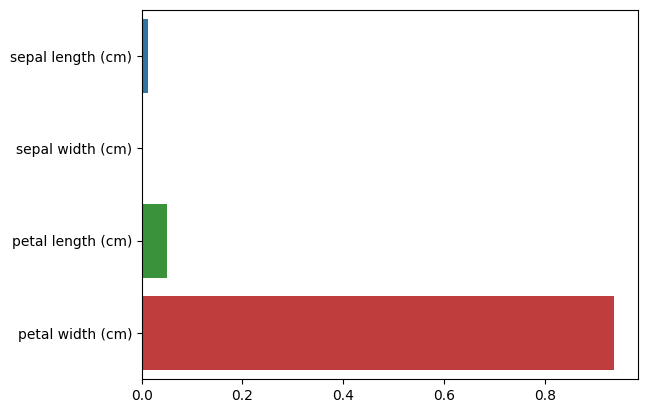

In [62]:
sns.barplot(x=dtc.feature_importances_,
            y=iris.feature_names)
plt.show()

In [63]:
from sklearn.datasets import make_classification

In [ ]:
x_features, y_labels = make_classification(n_features=2,
                    n_redundant=0,
                    n_informative=2,
                    n_classes=3,
                    n_clusters_per_class=1)
x_features.shape,y_labels.shape

In [67]:
df = pd.DataFrame(x_features)
df.describe()

,0,1
count,100.000000,100.000000
mean,-0.227201,-0.415301
std,1.224077,1.279276
min,-2.682163,-3.571697
25%,-1.142945,-1.408334
50%,-0.366085,-0.483164
75%,0.744562,0.512921
max,2.324538,2.321010


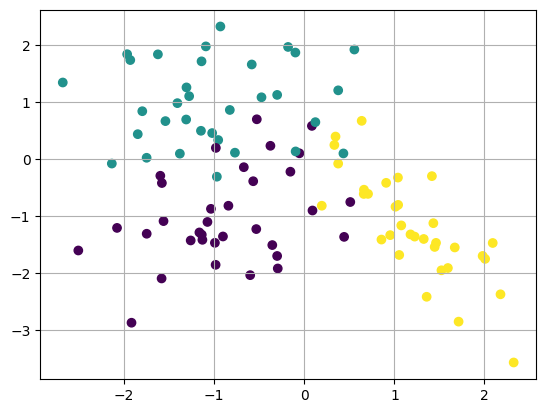

In [68]:
plt.scatter(x_features[:,0],
            x_features[:,1],
            c=y_labels)
plt.grid()
plt.show()

In [69]:
def visualize_boundary(model, x, y):
    fig,ax = plt.subplots()
    ax.scatter(x[:, 0], x[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    model.fit(x, y)

    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),
                                np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

<ipython-input-69-8953efa741b1>:17: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


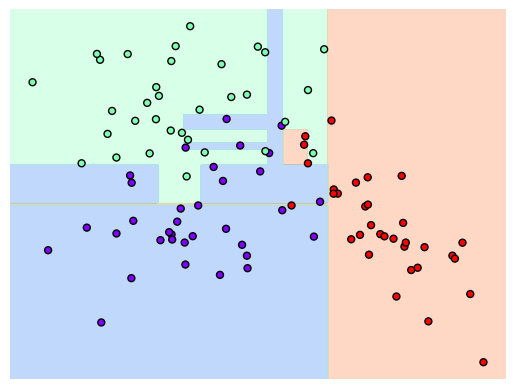

In [70]:
dtc = DecisionTreeClassifier()
dtc.fit(x_features,y_labels)
visualize_boundary(dtc,x_features,y_labels)

In [73]:
df = pd.DataFrame(x_features)
df.describe()

,0,1
count,100.000000,100.000000
mean,-0.227201,-0.415301
std,1.224077,1.279276
min,-2.682163,-3.571697
25%,-1.142945,-1.408334
50%,-0.366085,-0.483164
75%,0.744562,0.512921
max,2.324538,2.321010


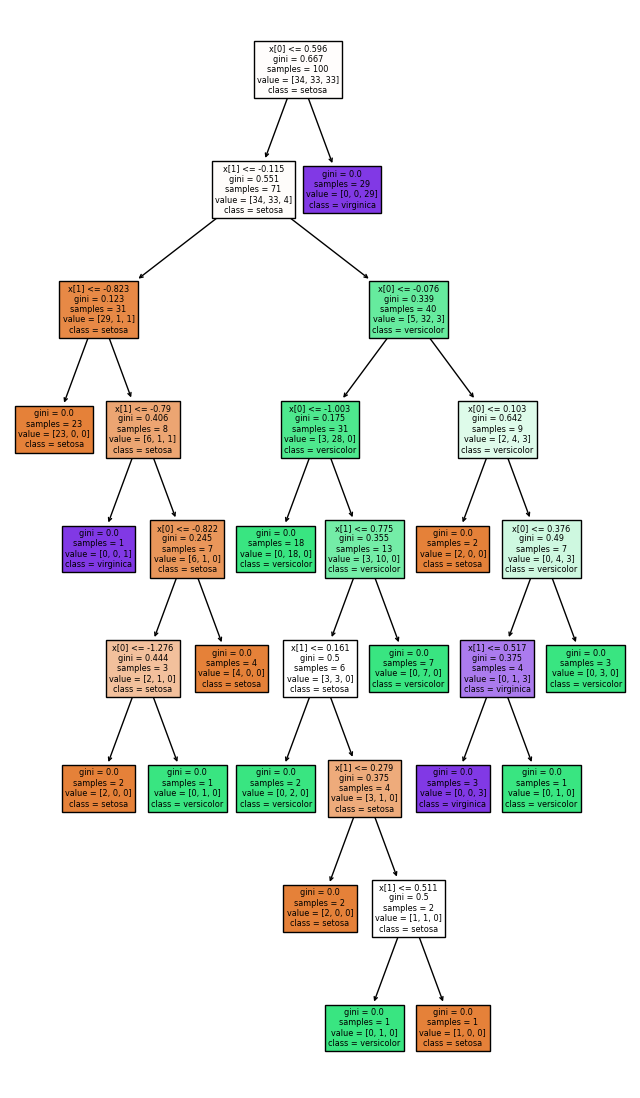

In [71]:
plt.figure(figsize=(8,14))
tree.plot_tree(dtc,filled=True,
               class_names=iris.target_names)
plt.show()

<ipython-input-69-8953efa741b1>:17: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


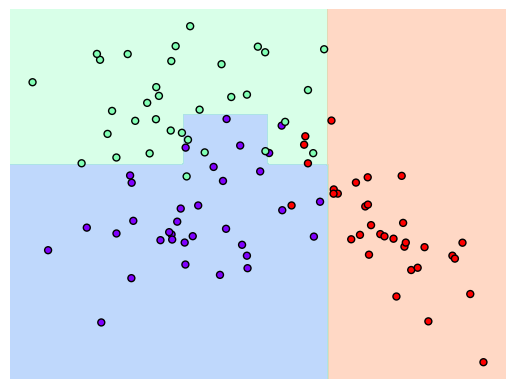

In [74]:
dtc = DecisionTreeClassifier(min_samples_leaf=6)
dtc.fit(x_features,y_labels)
visualize_boundary(dtc,x_features,y_labels)